# Histogram of the number of particles in each dataset

The dataset and the corresponding module are placed at `dataset` and `source/dataset` respectively.

In [1]:
import os
import sys

import awkward as ak
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns
import tqdm

sys.path.append(os.path.abspath('../'))

from source import dataset

sns.set_theme()

In [2]:
def histogram_of_num_ptcs_per_jet(jet_events: dataset.JetEvents, ax: plt.Axes, title: str = None):
    """Histogram of the number of particles in each jet."""

    # Get the number of particles in each event.
    num_ptcs = jet_events.number_of_particles()

    # Set the y-axis formatter to thousands.
    y_axis_formatter = lambda y, pos: f"{int(y / 1000)}K"
    ax.yaxis.set_major_formatter(FuncFormatter(y_axis_formatter))
    
    # The 0-th column plots the total overlapped histogram.
    pdf, _, _ = ax.hist(
        x=ak.to_numpy(num_ptcs),
        bins=20,
        alpha=0.6,
        density=False,
    )

    # Set the title of the plot.
    if title is not None:
        ax.set_title(title)

### `JetClass` Dataset

JetClass Dataset:   0%|          | 0/10 [00:00<?, ?it/s]

JetClass Dataset: 100%|██████████| 10/10 [00:14<00:00,  1.47s/it]


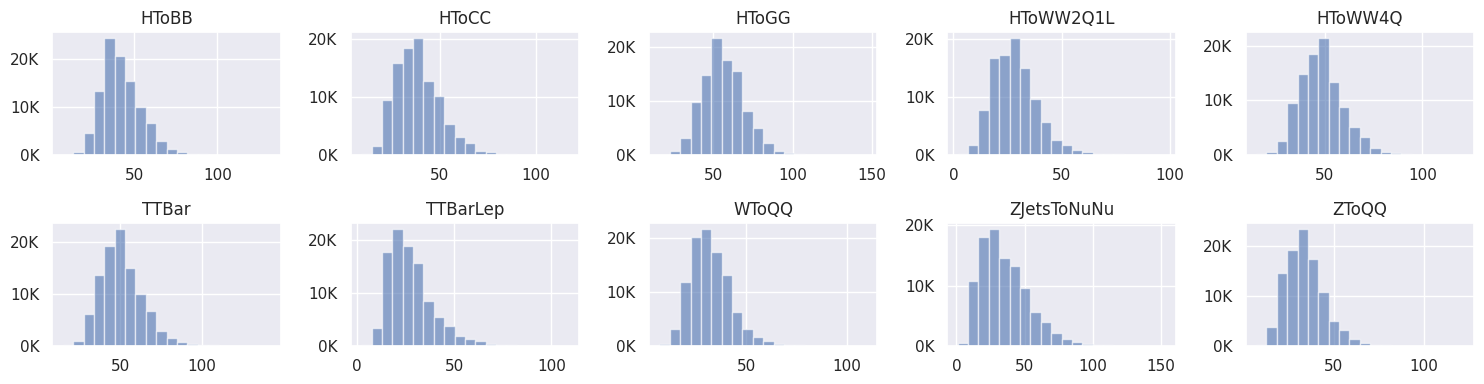

In [3]:
num_row = 2
num_col = 5
fig, ax = plt.subplots(num_row, num_col, figsize=(3 * num_col, 2 * num_row))

for i, channel in enumerate(tqdm.tqdm(dataset.JetClass.CHANNELS, desc='JetClass Dataset')):
    histogram_of_num_ptcs_per_jet(
        jet_events=dataset.JetClass(channel=channel, num_root=1),
        ax=ax.flat[i],
        title=channel,
    )

plt.tight_layout()

### `JetNet` Dataset

JetNet Dataset:  20%|██        | 1/5 [00:00<00:00,  4.51it/s]

JetNet Dataset: 100%|██████████| 5/5 [00:01<00:00,  4.15it/s]


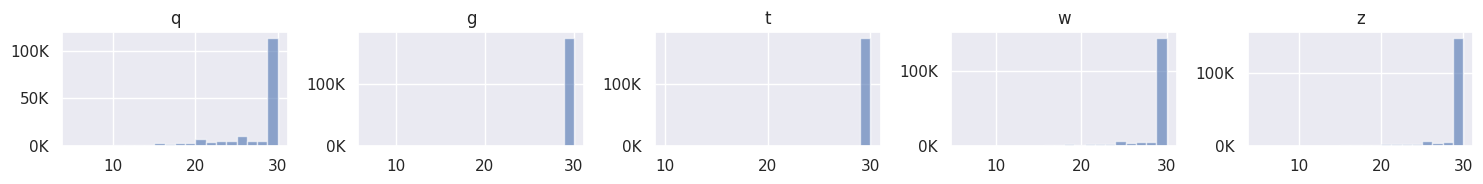

In [4]:
num_row = 1
num_col = 5
fig, ax = plt.subplots(num_row, num_col, figsize=(3 * num_col, 2 * num_row))

for i, channel in enumerate(tqdm.tqdm(dataset.JetNet.CHANNELS, desc='JetNet Dataset')):
    histogram_of_num_ptcs_per_jet(
        jet_events=dataset.JetNet(channel),
        ax=ax.flat[i],
        title=channel,
    )

plt.tight_layout()